In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#preprocessing turns dataset 
#imputes null values with RandomForestRegressor model/ can use KNNImputer also
turns_dataset = pd.read_csv("turns.csv")

# Label Encoding
label_encoder = LabelEncoder()
nickname_values = turns_dataset['nickname']
turns_dataset['nickname'] = label_encoder.fit_transform(nickname_values)
turns_dataset['rack'] = label_encoder.fit_transform(turns_dataset['rack'])
turns_dataset['location'] = label_encoder.fit_transform(turns_dataset['location'])
turns_dataset['move'] = label_encoder.fit_transform(turns_dataset['move'])

# One-Hot Encoding
one_hot_encoded = pd.get_dummies(turns_dataset['turn_type'], prefix='turn_type')
turns_dataset = pd.concat([turns_dataset, one_hot_encoded], axis=1)
turns_dataset.drop('turn_type', axis=1, inplace=True)
# Display the encoded DataFrame
print(turns_dataset.head())

# Initialize a simple imputer with the model
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer using non-missing values to train the model
imputer.fit(turns_dataset.dropna())

# Transform the data, replacing missing values with predictions from the model
final_data_imputed = imputer.transform(turns_dataset)
turns_dataset = pd.DataFrame(final_data_imputed, columns=turns_dataset.columns)
turns_dataset['nickname'] = nickname_values

   game_id  turn_number  nickname    rack  location    move  points  score  \
0        1            1       110  420706       188  134068      10     10   
1        1            2      1374  261686       175  179528      18     18   
2        1            3       110  432472       162  211221      16     26   
3        1            4      1374  550469       150  316060      16     34   
4        1            5       110  197251       371   31157      28     54   

   turn_type_Challenge  turn_type_End  turn_type_Exchange  turn_type_Pass  \
0                False          False               False           False   
1                False          False               False           False   
2                False          False               False           False   
3                False          False               False           False   
4                False          False               False           False   

   turn_type_Play  turn_type_Six-Zero Rule  turn_type_Timeout  
0   

In [3]:
# Load the datasets
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv") 
player_data = pd.concat([train_data, test_data], ignore_index=True)
player_data = player_data.dropna()
games_metadata = pd.read_csv("games.csv")

# Merge Player Data and Games Metadata on game_id
merged_data = pd.merge(player_data, games_metadata, on="game_id")

# Merge with Turns Dataset on game_id as well
final_data = pd.merge(merged_data, turns_dataset, on=["game_id","nickname"])

# Display the merged dataset to check
print(final_data.head())

   game_id   nickname  score_x  rating      first time_control_name  \
0        1  BetterBot      335  1637.0  BetterBot           regular   
1        1  BetterBot      335  1637.0  BetterBot           regular   
2        1  BetterBot      335  1637.0  BetterBot           regular   
3        1  BetterBot      335  1637.0  BetterBot           regular   
4        1  BetterBot      335  1637.0  BetterBot           regular   

  game_end_reason  winner           created_at lexicon  ...      move  points  \
0        STANDARD       1  2022-08-26 03:38:49   NWL20  ...  134068.0    10.0   
1        STANDARD       1  2022-08-26 03:38:49   NWL20  ...  211221.0    16.0   
2        STANDARD       1  2022-08-26 03:38:49   NWL20  ...   31157.0    28.0   
3        STANDARD       1  2022-08-26 03:38:49   NWL20  ...  261350.0    29.0   
4        STANDARD       1  2022-08-26 03:38:49   NWL20  ...  226266.0    68.0   

  score_y  turn_type_Challenge  turn_type_End  turn_type_Exchange  \
0    10.0        

In [4]:
# Check for missing values
print(final_data.isnull().sum())

# Handle duplicate rows
final_data.drop_duplicates(inplace=True)

# Check data types
print(final_data.dtypes)

# Handle outliers (if applicable)

game_id                    0
nickname                   0
score_x                    0
rating                     0
first                      0
time_control_name          0
game_end_reason            0
winner                     0
created_at                 0
lexicon                    0
initial_time_seconds       0
increment_seconds          0
rating_mode                0
max_overtime_minutes       0
game_duration_seconds      0
turn_number                0
rack                       0
location                   0
move                       0
points                     0
score_y                    0
turn_type_Challenge        0
turn_type_End              0
turn_type_Exchange         0
turn_type_Pass             0
turn_type_Play             0
turn_type_Six-Zero Rule    0
turn_type_Timeout          0
dtype: int64
game_id                      int64
nickname                    object
score_x                      int64
rating                     float64
first                       object


            game_id       score_x        rating        winner  \
count  1.698913e+06  1.698913e+06  1.698913e+06  1.698913e+06   
mean   3.639026e+04  4.030151e+02  1.890885e+03  3.499508e-01   
std    2.101207e+04  7.673972e+01  2.261090e+02  4.845113e-01   
min    1.000000e+00 -6.400000e+01  1.033000e+03 -1.000000e+00   
25%    1.818400e+04  3.550000e+02  1.698000e+03  0.000000e+00   
50%    3.637800e+04  4.010000e+02  1.928000e+03  0.000000e+00   
75%    5.462900e+04  4.490000e+02  2.064000e+03  1.000000e+00   
max    7.277300e+04  1.171000e+03  2.510000e+03  1.000000e+00   

       initial_time_seconds  increment_seconds  max_overtime_minutes  \
count          1.698913e+06       1.698913e+06          1.698913e+06   
mean           1.200542e+03       2.367973e-01          2.308818e+00   
std            7.070458e+02       2.640685e+00          3.169966e+00   
min            1.500000e+01       0.000000e+00          0.000000e+00   
25%            9.000000e+02       0.000000e+00        

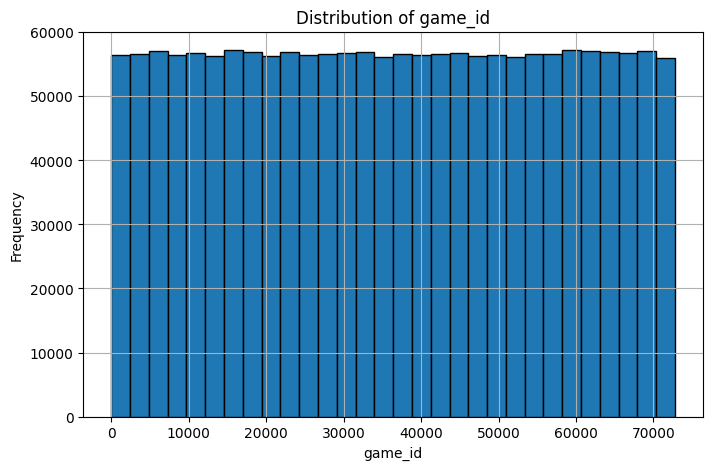

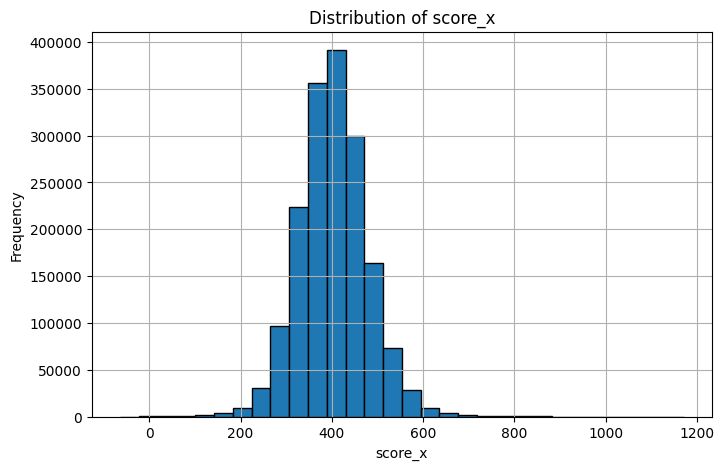

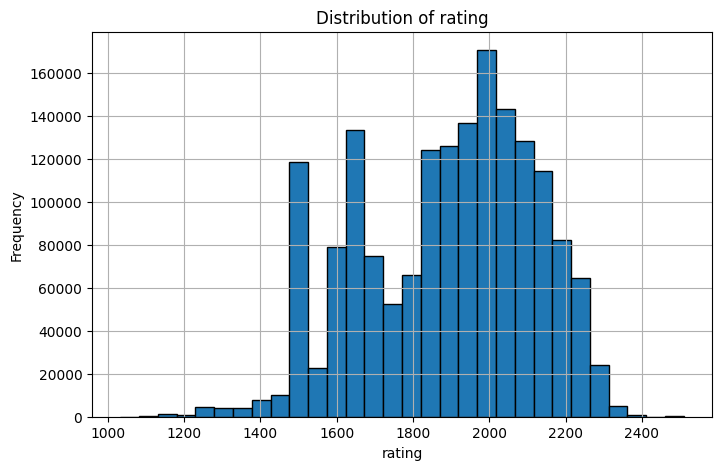

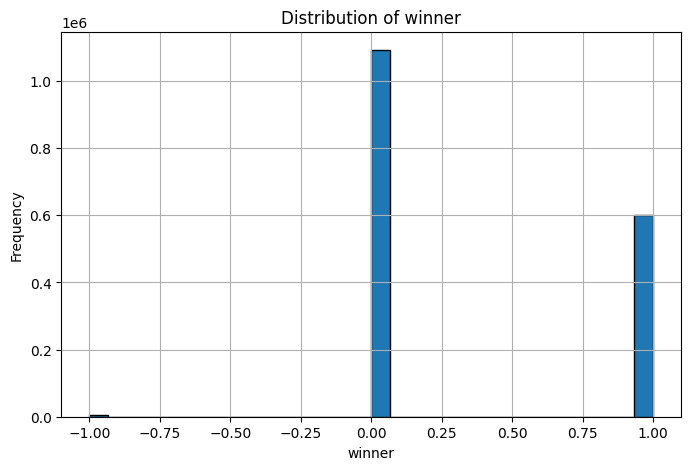

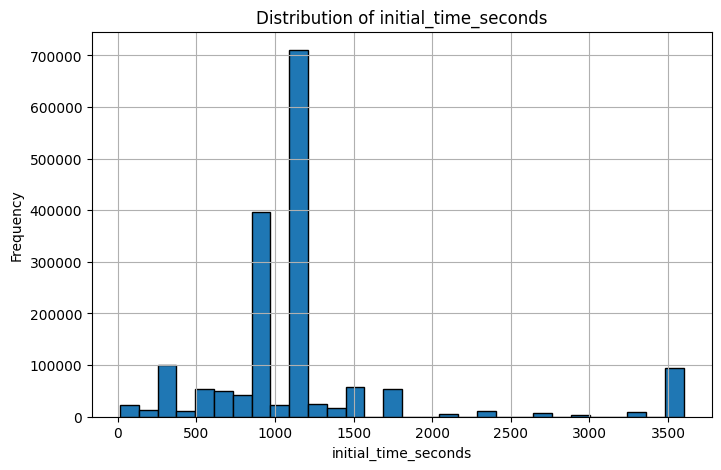

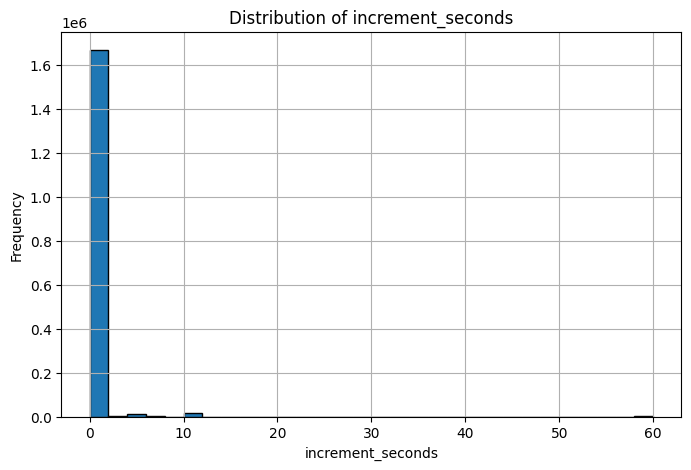

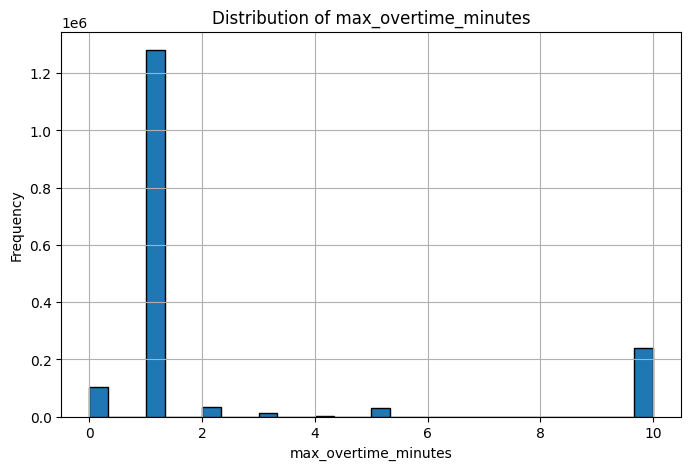

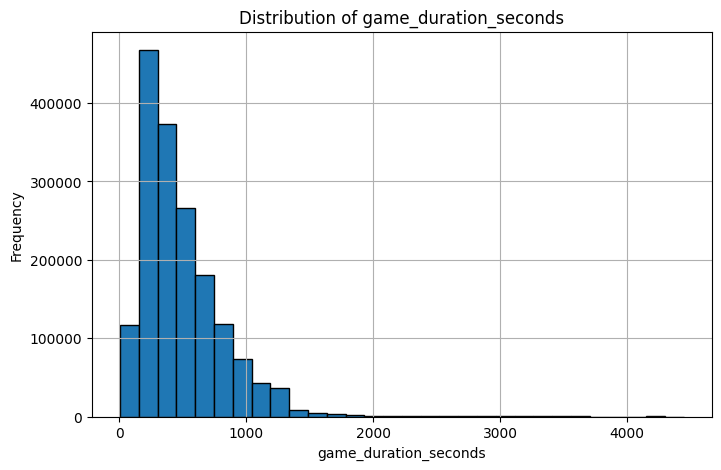

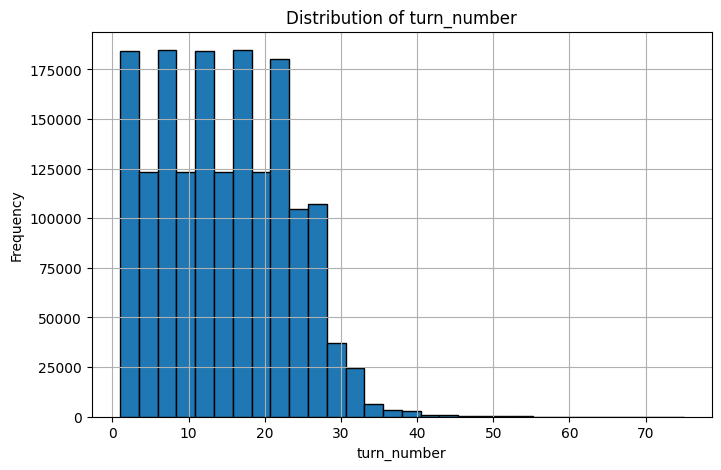

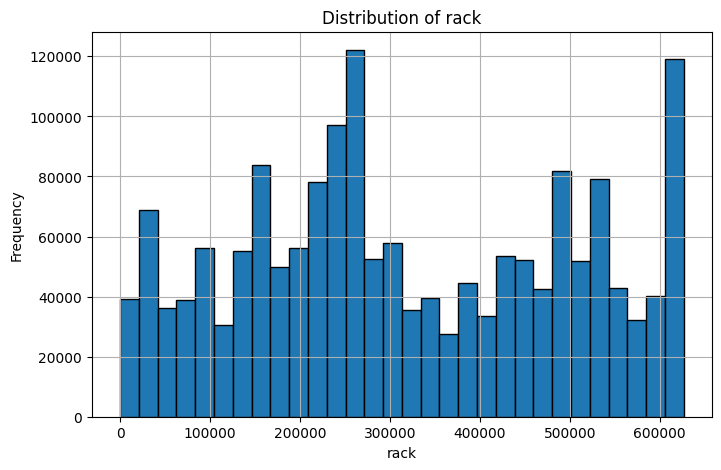

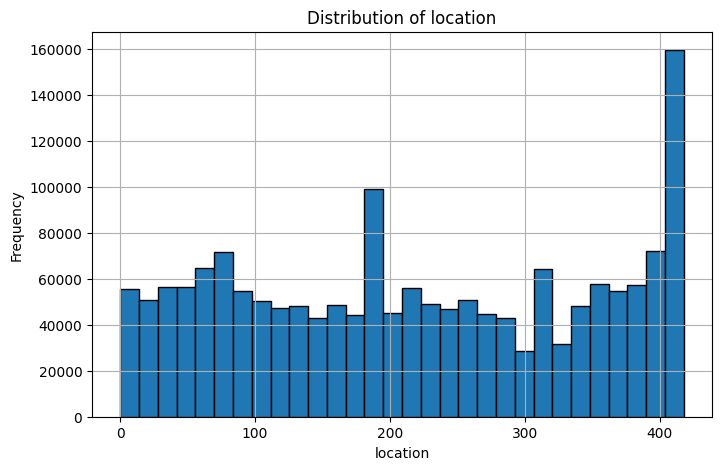

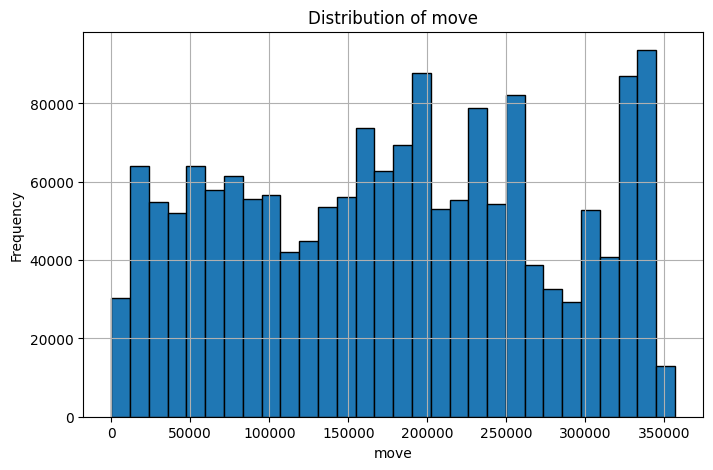

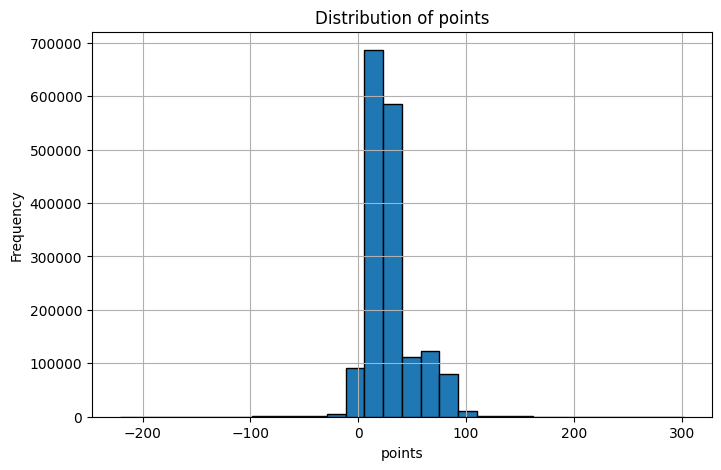

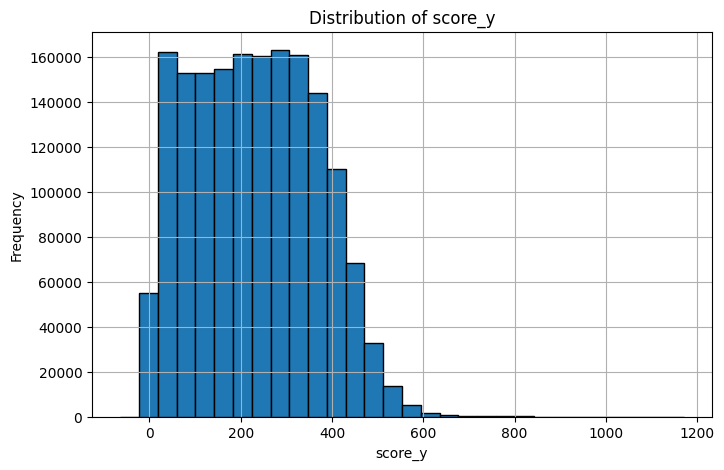

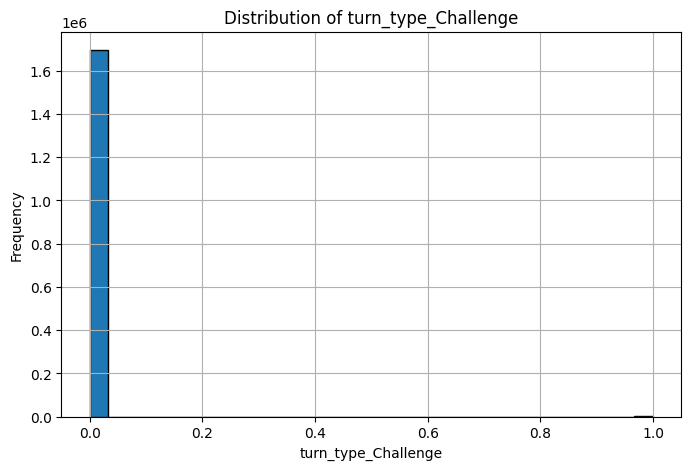

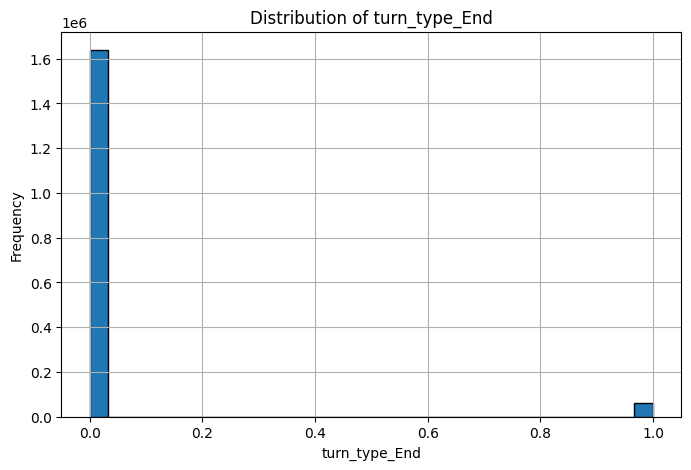

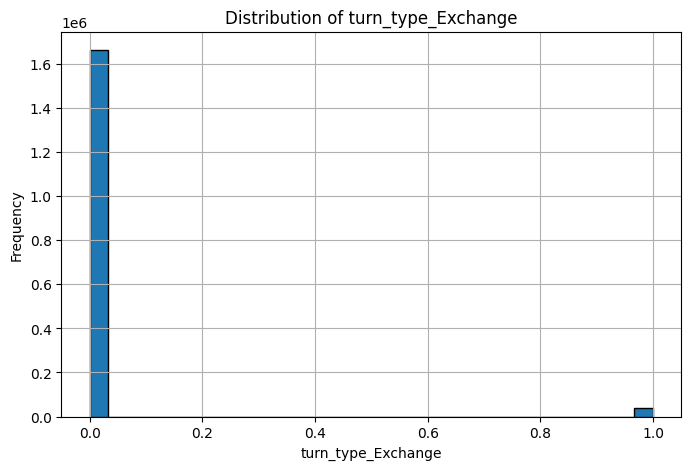

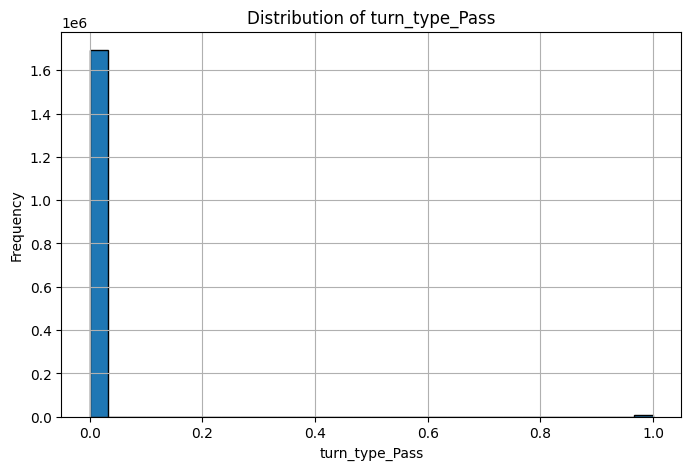

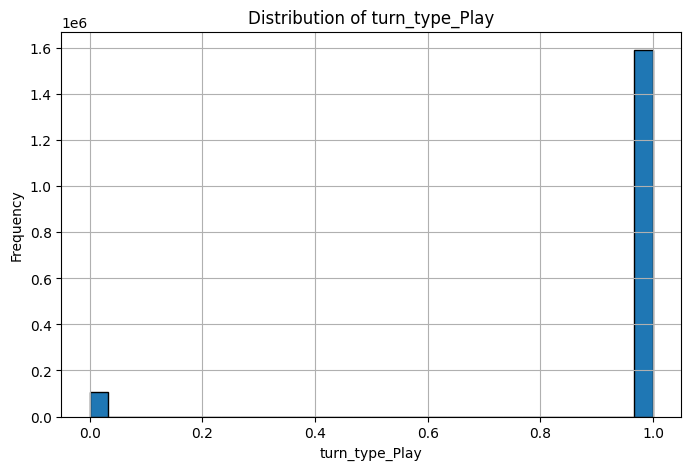

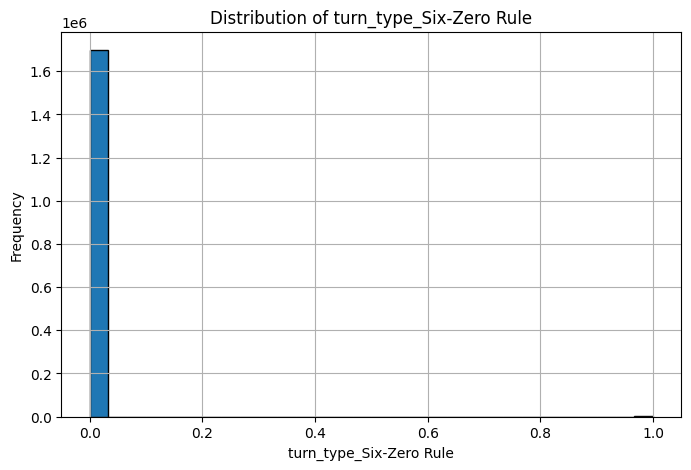

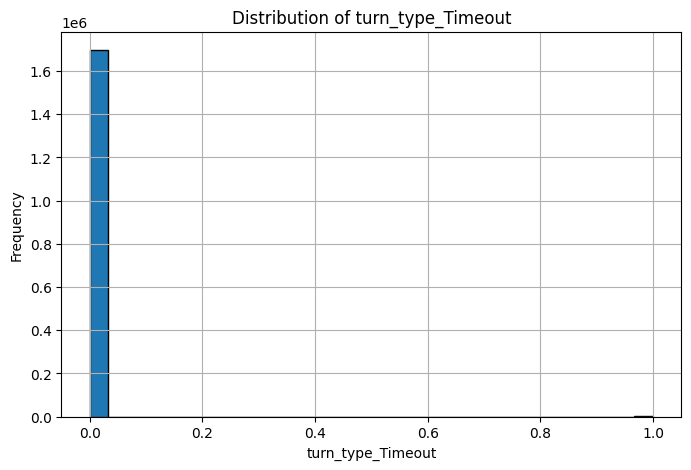

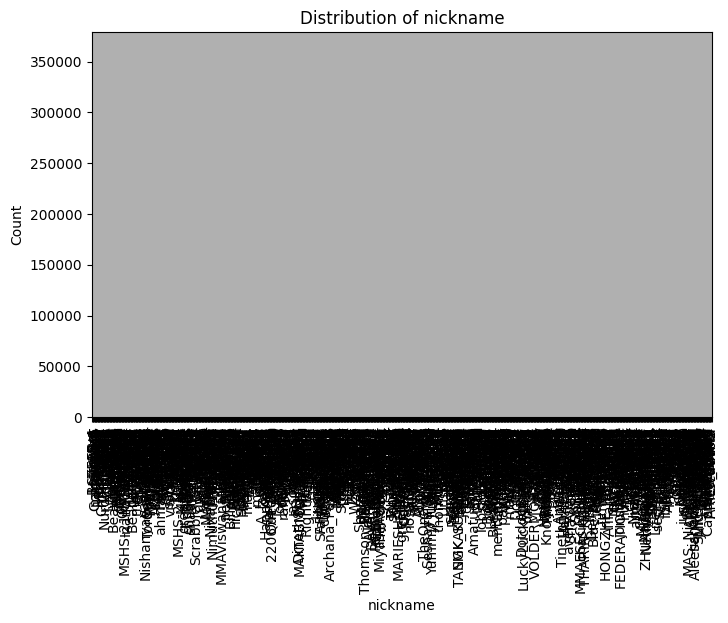

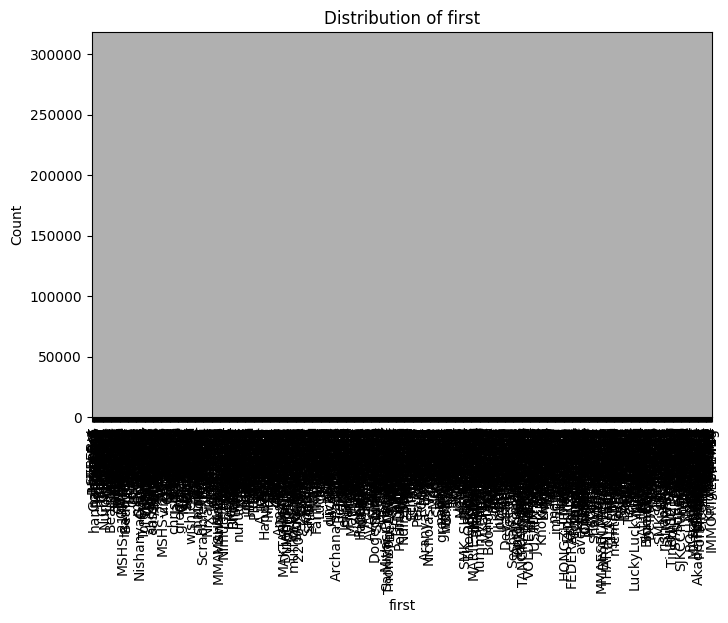

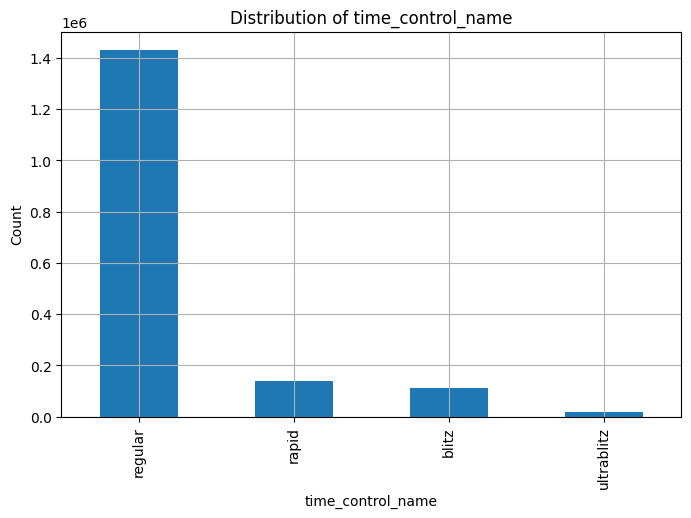

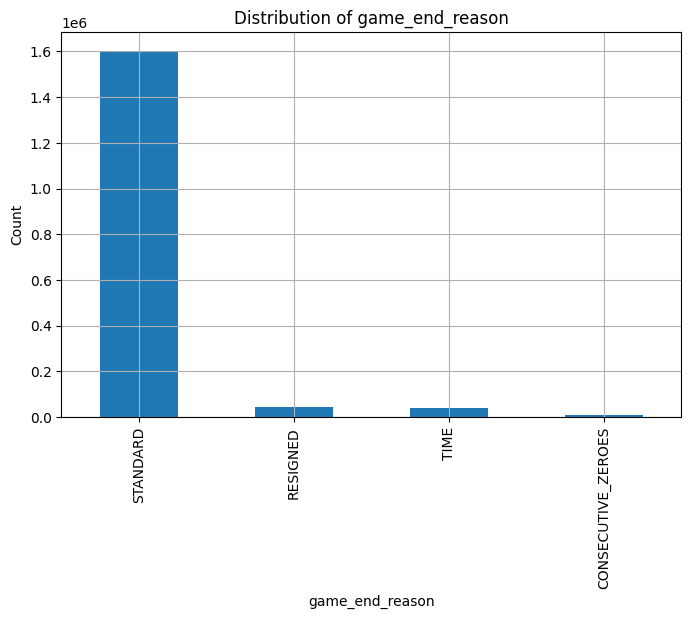

In [ ]:
# EDA
# Summary statistics
print(final_data.describe())

# Distribution of numerical features

numerical_cols = final_data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    plt.hist(final_data[col], bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Categorical features analysis
categorical_cols = final_data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    final_data[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

In [5]:
#this method encodes all the categorical features of games/turns dataset
def encodeFinalValues(final_data):
    # LabelEncoding - 
    final_data['nickname'] = [str(val) for val in final_data['nickname']]
    final_data['first'] = [str(val) for val in final_data['first']]
    combined_values = pd.concat([final_data['nickname'], final_data['first']])
    encoded_values = label_encoder.fit_transform(combined_values)
    
    # Update the DataFrame with encoded values
    final_data['nickname'] = encoded_values[:len(final_data)]
    final_data['first'] = encoded_values[len(final_data):]

    # # One-Hot Encoding
    one_hot_encoded = pd.get_dummies(final_data['time_control_name'], prefix='time_control_name')
    final_data = pd.concat([final_data, one_hot_encoded], axis=1)
    
    one_hot_encoded = pd.get_dummies(final_data['lexicon'], prefix='lexicon')
    final_data = pd.concat([final_data, one_hot_encoded], axis=1)
    
    one_hot_encoded = pd.get_dummies(final_data['rating_mode'], prefix='rating_mode')
    final_data = pd.concat([final_data, one_hot_encoded], axis=1)
    
    one_hot_encoded = pd.get_dummies(final_data['game_end_reason'], prefix='game_end_reason')
    final_data = pd.concat([final_data, one_hot_encoded], axis=1)
    
    final_data.drop('time_control_name', axis=1, inplace=True)
    final_data.drop('created_at', axis=1, inplace=True)
    final_data.drop('lexicon', axis=1, inplace=True)
    final_data.drop('rating_mode', axis=1, inplace=True)
    final_data.drop('game_end_reason', axis=1, inplace=True)
    
    # # Display the encoded DataFrame
    print(final_data.dtypes)
    return final_data
final_data = encodeFinalValues(final_data)

game_id                                 int64
nickname                                int32
score_x                                 int64
rating                                float64
first                                   int32
winner                                  int64
initial_time_seconds                    int64
increment_seconds                       int64
max_overtime_minutes                    int64
game_duration_seconds                 float64
turn_number                           float64
rack                                  float64
location                              float64
move                                  float64
points                                float64
score_y                               float64
turn_type_Challenge                   float64
turn_type_End                         float64
turn_type_Exchange                    float64
turn_type_Pass                        float64
turn_type_Play                        float64
turn_type_Six-Zero Rule           

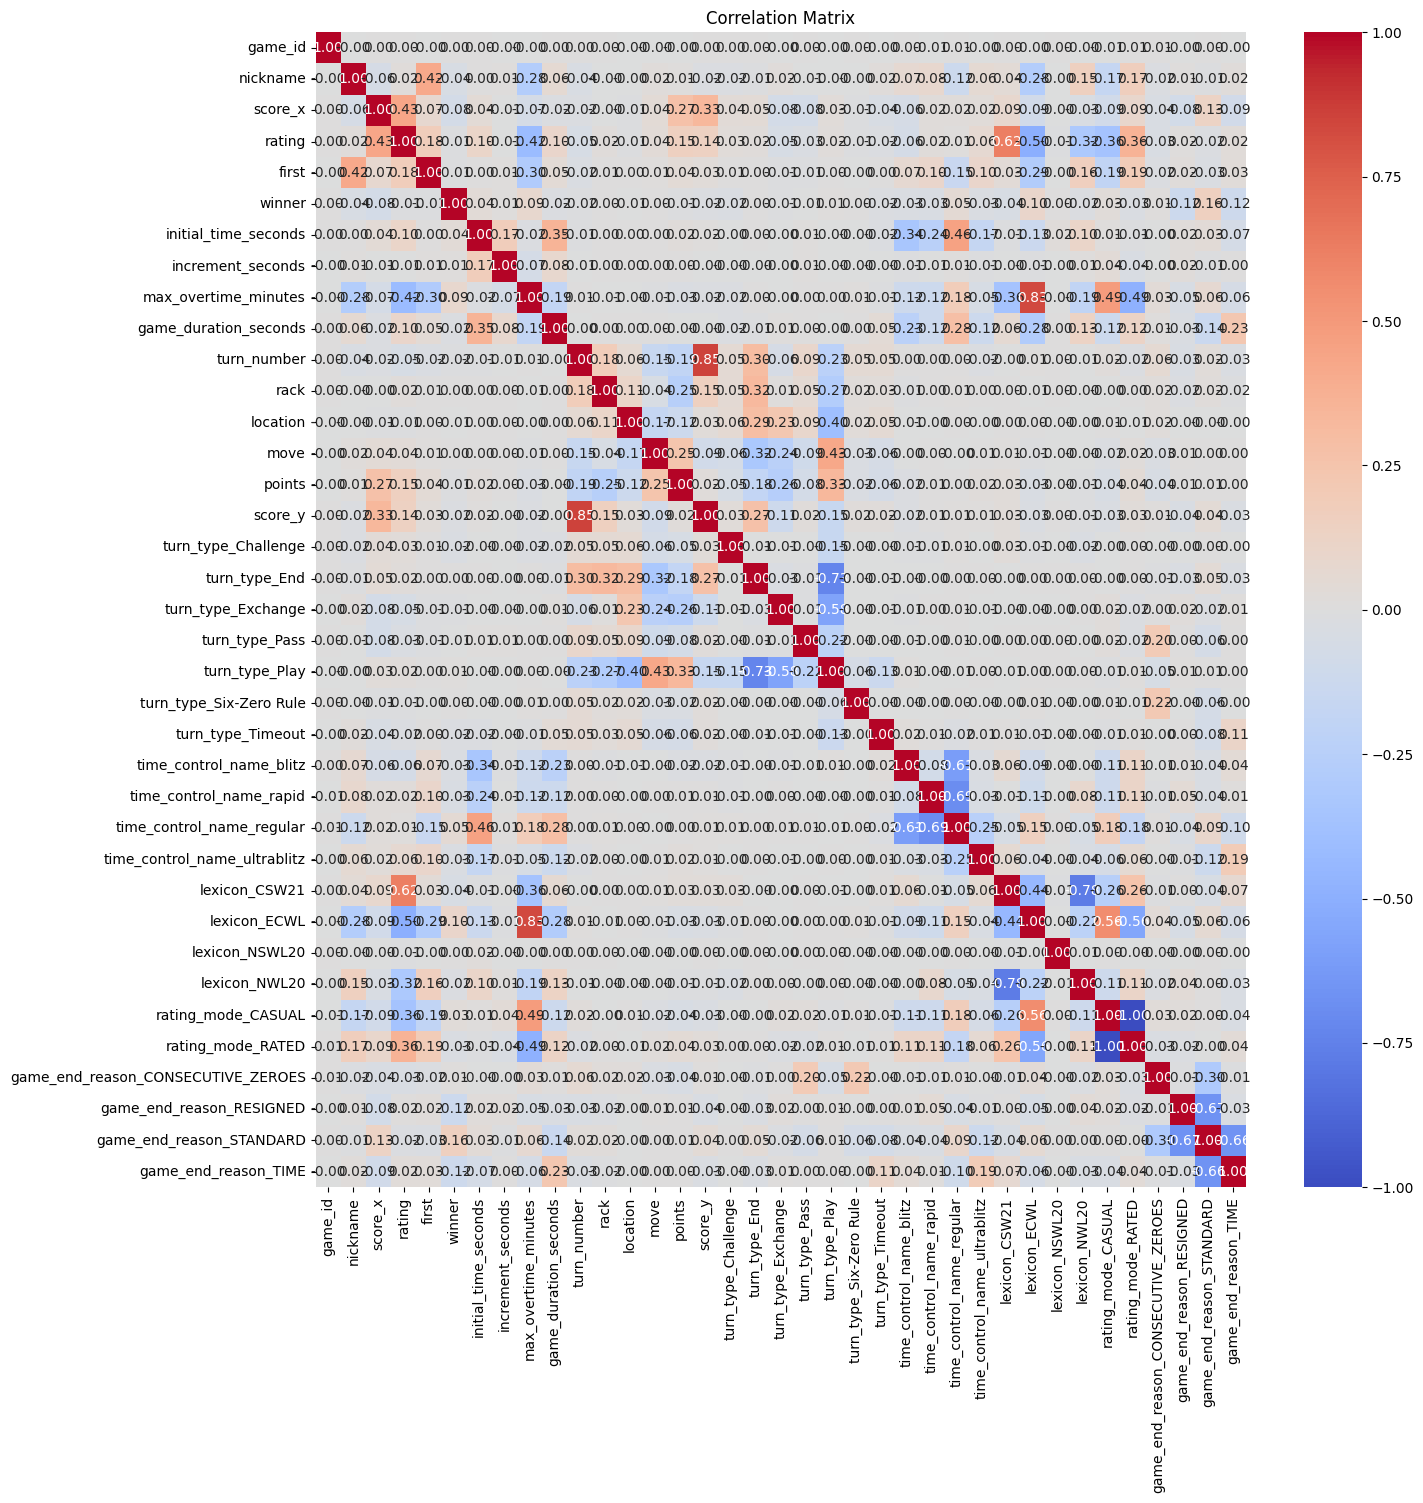

In [6]:
# Correlation analysis
import seaborn as sns
correlation_matrix = final_data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [7]:
#Useful features - from the correlation matrix built
useful_features = ['nickname', 'lexicon_CSW21', 'lexicon_ECWL', 'initial_time_seconds', 'score_x', 
                    'lexicon_NWL20', 'first', 'max_overtime_minutes','rating_mode_CASUAL','game_duration_seconds','rating_mode_RATED', 'rating']
useful_data = final_data[useful_features]

In [8]:
X = useful_data.drop('rating', axis=1)  # Assuming 'rating' is the column name for the target variable
y = useful_data['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Initialize the model
model = GradientBoostingRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 8139.009197939104
R-squared Score: 0.8407004234451748


In [177]:
final_data.to_csv("final_data.csv", index = False)

In [128]:
test_data = pd.read_csv("test.csv")
# Drop rows without any NaN values
human_player_data = test_data[test_data.isnull().any(axis=1)]
# Merge Player Data and Games Metadata on game_id
merged_data = pd.merge(human_player_data, games_metadata, on="game_id")

# Merge with Turns Dataset on game_id as well
predict_human_rating = pd.merge(merged_data, turns_dataset, on=["game_id","nickname"])

predict_human_rating_sorted = predict_human_rating.sort_values(by=['game_id', 'score_x'], ascending=[True, False])

# Group by game_id and get the index of the row with the highest score in each group
idx = predict_human_rating_sorted.groupby('game_id')['score_y'].idxmax()

# Filter the DataFrame using the obtained index
predict_human_rating_sorted = predict_human_rating_sorted.loc[idx]

In [129]:
predict_human_rating_sorted = encodeFinalValues(predict_human_rating_sorted)
predict_human_rating_sorted.head() 

13         Super
26        Priya1
40    TileRunner
55    Anfield223
66    friesbasil
dtype: object
    game_id  nickname  score_x  rating  first  winner  initial_time_seconds  \
13        2       249      488     NaN    249       1                  3600   
26        7       197      379     NaN    197       1                  1260   
40       11       259      462     NaN    259       1                  1200   
55       14        19      359     NaN    222       0                   900   
66       27       324      456     NaN    324       1                  1200   

    increment_seconds  max_overtime_minutes  game_duration_seconds  ...  \
13                  0                     1             364.214418  ...   
26                  0                     1             385.599607  ...   
40                  0                     1             501.739156  ...   
55                  0                     1             293.253051  ...   
66                  0                     1        

,game_id,nickname,score_x,rating,first,winner,initial_time_seconds,increment_seconds,max_overtime_minutes,game_duration_seconds,...,time_control_name_ultrablitz,lexicon_CSW21,lexicon_ECWL,lexicon_NWL20,rating_mode_CASUAL,rating_mode_RATED,game_end_reason_CONSECUTIVE_ZEROES,game_end_reason_RESIGNED,game_end_reason_STANDARD,game_end_reason_TIME
13,2,249,488,NaN,249,1,3600,0,1,364.214418,...,False,True,False,False,False,True,False,False,True,False
26,7,197,379,NaN,197,1,1260,0,1,385.599607,...,False,True,False,False,False,True,False,False,True,False
40,11,259,462,NaN,259,1,1200,0,1,501.739156,...,False,False,False,True,True,False,False,False,True,False
55,14,19,359,NaN,222,0,900,0,1,293.253051,...,False,True,False,False,False,True,False,False,True,False
66,27,324,456,NaN,324,1,1200,0,1,203.963230,...,False,True,False,False,False,True,False,False,True,False


In [176]:
#creates the final submission.csv file.
predict_rating = predict_human_rating_sorted[useful_features]
predict_rating = predict_rating.drop('rating', axis=1)  # Assuming 'rating' is the column name for the target variable
model_predictions = model.predict(predict_rating)
model_predictions = pd.DataFrame(model_predictions, columns=['rating'])
game_id_column = predict_human_rating_sorted['game_id']
rating_column = model_predictions['rating']
ratings = []
game_ids = []
for game in predict_human_rating_sorted['game_id']:
    game_ids.append(game)
for rating in model_predictions['rating']:
    ratings.append(rating)
pd.DataFrame({'game_id': game_ids, 'rating': ratings}).to_csv('predicted_human_rating.csv', index=False)